In [1]:
# !pip install fastai
!pip install -U pyarrow

import numpy as np
import pandas as pd
import seaborn as sns

import requests
import ast
import os
import gc
import matplotlib.pyplot as plt

# from fastai.vision import *

Requirement already up-to-date: pyarrow in /usr/local/lib/python3.6/dist-packages (0.13.0)


In [0]:
# Will need to login to access the bucket. The following lines of code do just that
from google.colab import auth
auth.authenticate_user()

# List out all the files in the directory (Make sure that we are logged in)
gs_path = 'platform-ai-research/datasets/ProductNet/'
# !gsutil ls gs://{gs_path}

In [3]:
# Pull from GS
gs_path = 'platform-ai-research/datasets/ProductNet/'
file_name = 'labels_5m'

remote_file = gs_path + file_name
!gsutil cp gs://{remote_file} {file_name} 

Copying gs://platform-ai-research/datasets/ProductNet/labels_5m...
| [1 files][202.9 MiB/202.9 MiB]                                                
Operation completed over 1 objects/202.9 MiB.                                    


In [0]:
df = pd.read_feather('labels_5m')

In [5]:
df.head()

,asin,label
0,0000037214,Clothing Accessories
1,0000032069,Clothing
2,0000031909,Athletics
3,0000032034,Clothing
4,0000031852,Athletics


In [6]:
val_cnt = pd.DataFrame(df['label'].value_counts(sort=True)).reset_index()

val_cnt.head()

,index,label
0,Clothing Accessories,1126894
1,Electronics Accessories,425398
2,Vehicle Parts & Accessories,278705
3,"Handbags, Wallets & Cases",259496
4,Clothing,236994


In [0]:
REMOVE_N_LESS_THAN = 125

remove = val_cnt[val_cnt['label'] < REMOVE_N_LESS_THAN]['index'].tolist()

In [8]:
remove

['Small Engines',
 'Live Animals',
 'Finance & Insurance',
 'Mining & Quarrying',
 'Erotic',
 'Shipping Supplies',
 'Heavy Machinery',
 'Magazines & Newspapers',
 'Presentation Supplies',
 'Religious Items',
 'Fanny Packs',
 'Plants',
 'Ottomans',
 'Briefcases',
 'Vehicles']

In [0]:
df = df[~df['label'].isin(remove)]

In [10]:
df['label'].nunique()

142

In [0]:
val_cnt = df['label'].value_counts(sort=True)

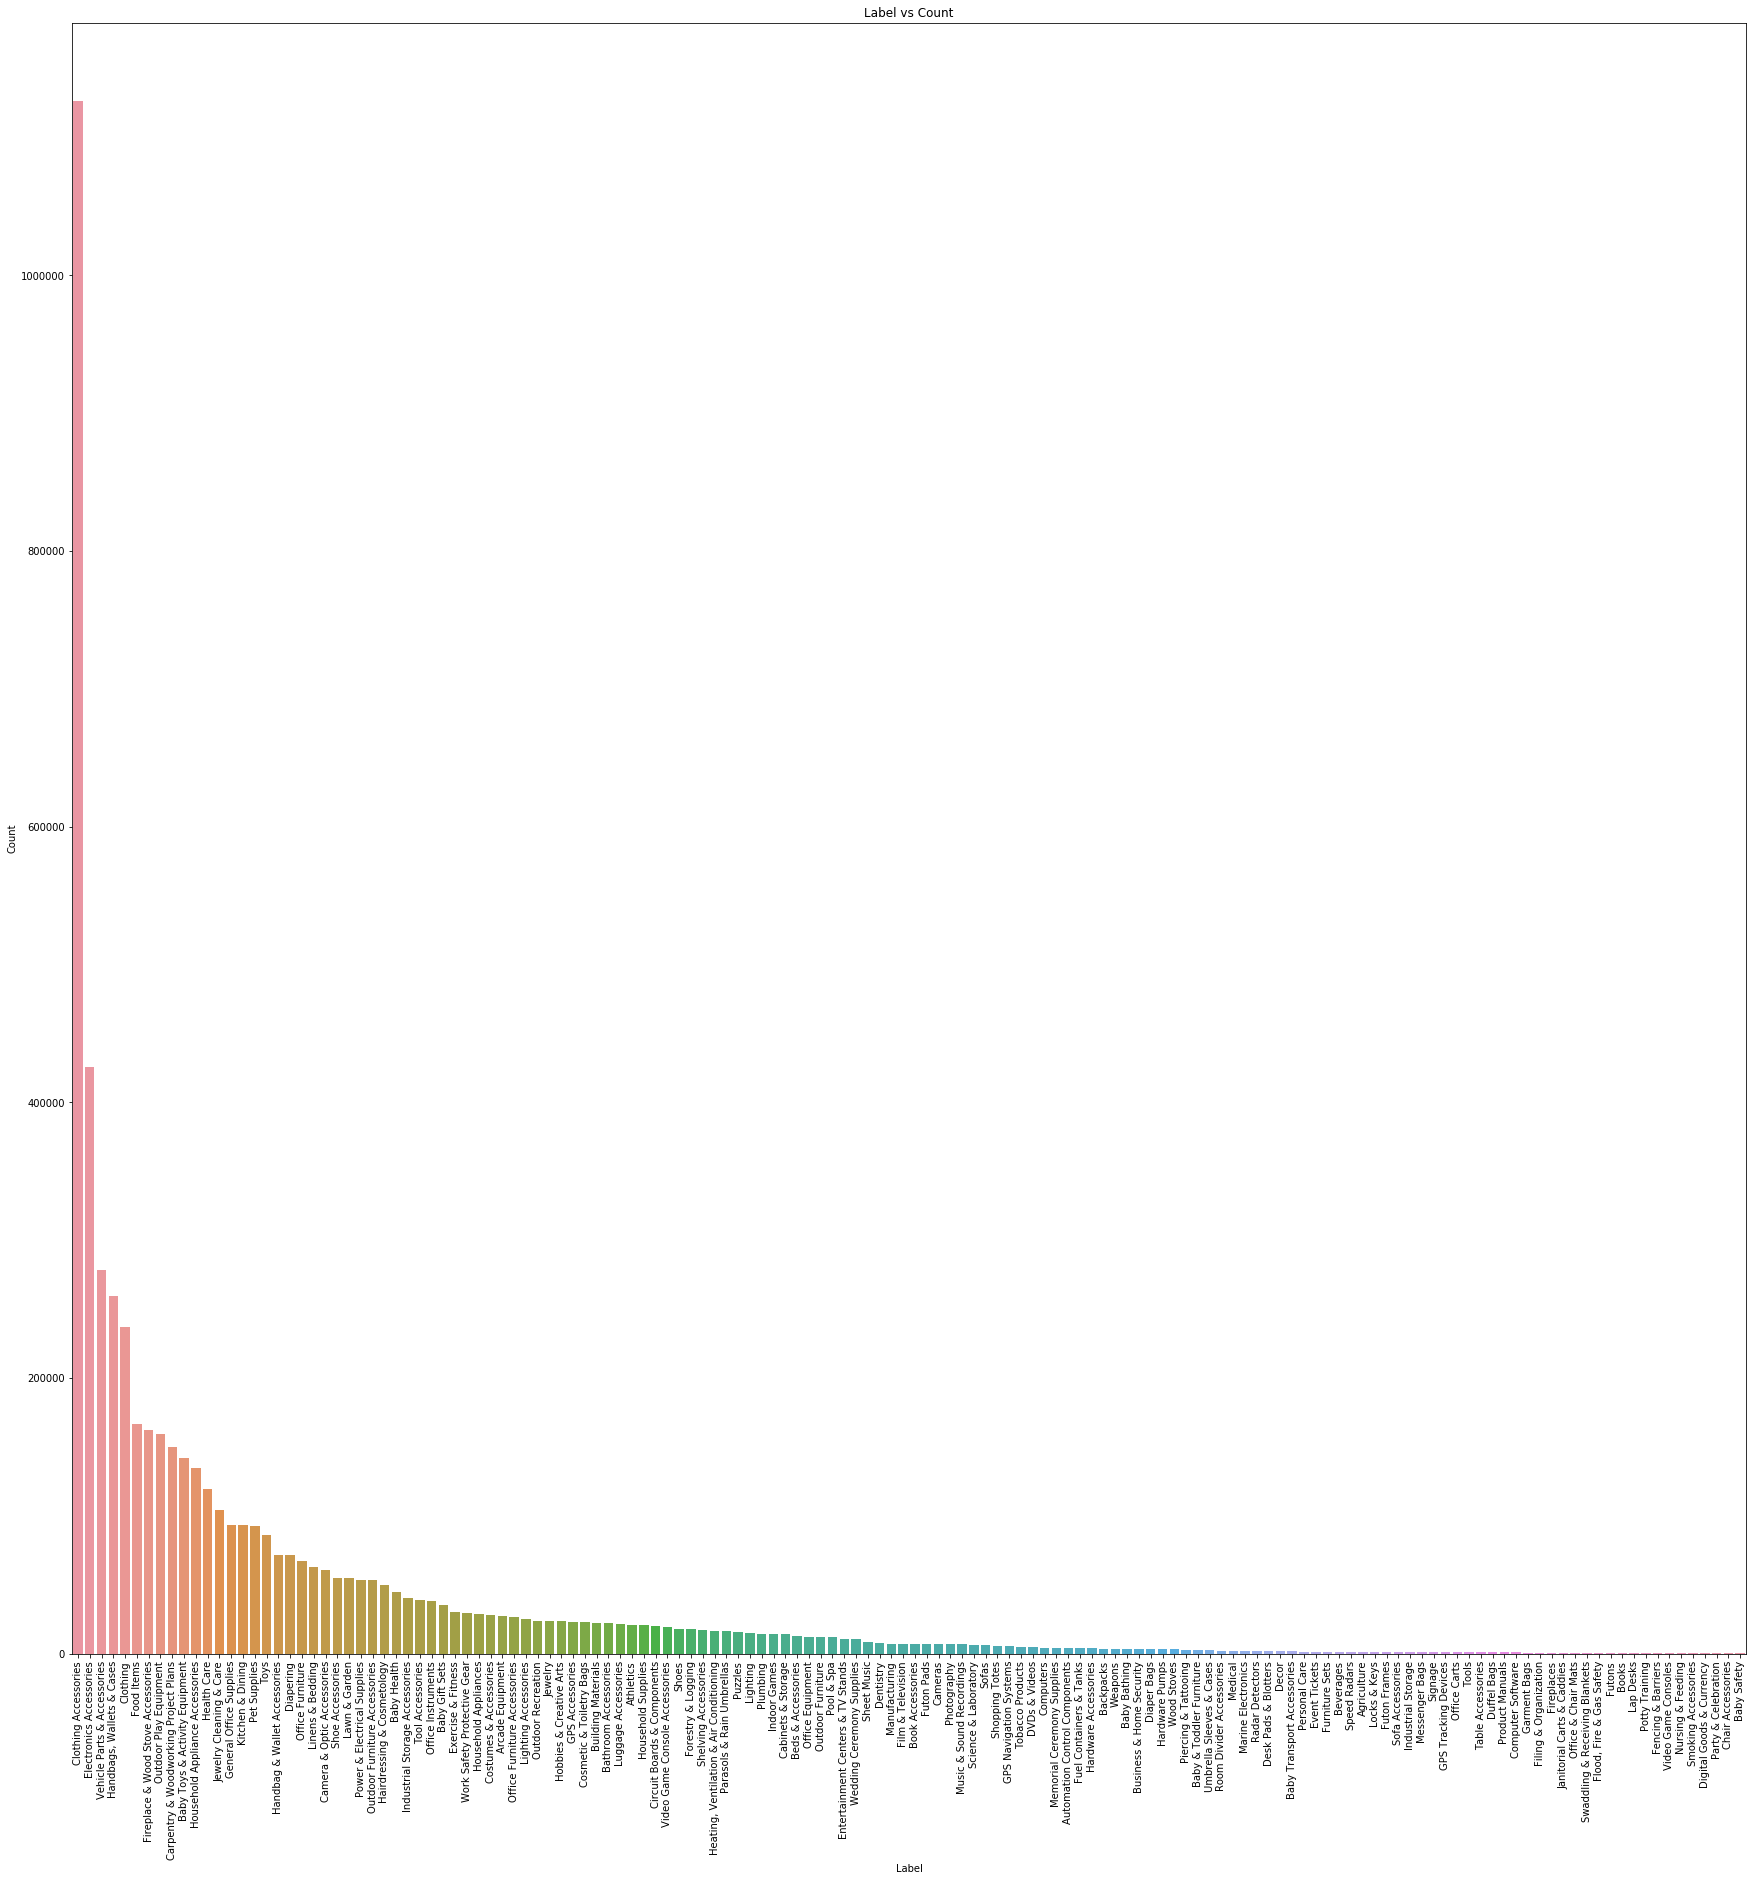

In [12]:
plt.figure(figsize=(30,30))
sns.barplot(val_cnt.index, 
            val_cnt.values)

plt.xlabel('Label')
plt.xticks(range(len(val_cnt)), val_cnt.index, rotation='vertical')
plt.ylabel('Count')
plt.title('Label vs Count')
plt.show()